In [1]:
import math
from math import sin, cos, log, ceil, pi
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size']=16



In [47]:
m_s = 50
g = 9.81
p = 1.091
v_e = 325
C_D = 0.15
m_po = 100
r = 0.5
A = math.pi *r**2
mdot_p = 20#For the first 5 seconds then 0
mdot = 20


def f(u):
    h = u[0]
    v = u[1]
    return numpy.array([v,
                       -g+((mdot*v_e)/(m_s+m_p))-(((1/2)*p*v*abs(v)*A*C_D)/(m_s+m_p))])

def euler_step(u,f,dt):
    return u+dt*f(u)


totalTime = 0
m_p = 100
dt = 0.1
h0 = 0
v0 = 0
T = 100
N = int(T/dt)+1
t=numpy.linspace(0,T,N)


u = numpy.zeros((N, 2))
u[0] = numpy.array([h0, v0])
m = numpy.empty((N,1))
m[0] = numpy.array([m_p])


for n in range(N-1):
    totalTime = totalTime + dt
    
    if totalTime > 5:
        step = 5
        mdot = 0
    else:
        step = totalTime
    
    m_p = m_po - mdot_p*step
    #print(m_p)
    
    u[n+1] = euler_step(u[n], f,dt)
    m[n+1] = m_p
    if u[n+1,0] < 0:
        break
#print(u)
#print(m)





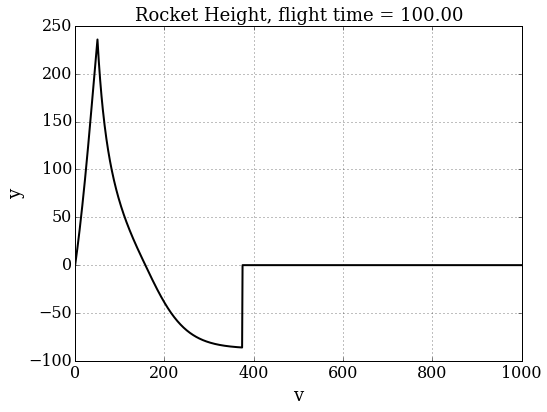

In [49]:
y = u[:,1]

pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'v', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Rocket Height, flight time = %.2f' % T, fontsize=18)
pyplot.plot(y,'k-', lw=2);

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}

$$h' = v$$
\begin{align}
v'& = -g + \frac{\dot{m}_pv_e}{(m_s+m_p) } - \frac{\frac{1}{2}\rho v|v|AC_D}{(m_s+m_p)}
\end{align}

$$h^{n+1} = v^n$$
\begin{align}
v^{n+1}& = -g + \frac{\dot{m}_pv_e}{(m_s+m_p) } - \frac{\frac{1}{2}\rho v^n|v^n|AC_D}{(m_s+m_p)}
\end{align}

